# Determining the Ising model numerically
For a good review of what this is all about, see [Inverse statistical problems: from the inverse Ising problem to data science](https://arxiv.org/abs/1702.01522). We want to solve for the variables $\boldsymbol{h}\in\mathbb{R}^{N}$ and $\boldsymbol{J}\in\mathbb{R}^{N\times(N-1)/2}$ such that our Ising model reproduces observed averages $\langle \sigma_i \rangle^D$ and correlations $\langle \sigma_i \sigma_j \rangle ^D$. We start by taking a naïve approach, using gradient ascent on the log-likelihood function:
$$
\begin{aligned}
L_{D}(\boldsymbol{h}, \boldsymbol{J}) &=\frac{1}{M} \ln p(\mathrm{D} \mid \boldsymbol{J}, \boldsymbol{h}) \\
&=\sum_{i<j} J_{i j}\left\langle\sigma_{i} \sigma_{j}\right\rangle^{D}+\sum_{i} h_{i}\left\langle\sigma_{i}\right\rangle^{D}-\ln Z(\boldsymbol{h}, \boldsymbol{J})
\end{aligned}
$$
The partial derivatives of the log-likelihood function are:
$$
\begin{aligned}
\frac{\partial L_{D}}{\partial h_i} =& \langle \sigma_i \rangle^D - \langle \sigma_i \rangle \\
\frac{\partial L_{D}}{\partial J_{ij}} =& \langle \sigma_i \sigma_j  \rangle^D - \langle \sigma_i \sigma_j \rangle
\end{aligned}
$$
and the gradient ascent update rule is:
$$
\begin{aligned}
h_i^{(t+1)} =& h_i^{(t)} + \lambda \frac{\partial L_{D}}{\partial h_i} \\
J_{ij}^{(t+1)} =& J_{ij}^{(t)} + \lambda \frac{\partial L_{D}}{\partial J_{ij}} 
\end{aligned}
$$
where $\lambda$ is the learning rate.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from MaxEnt import Ising

## Create an Ising model
We define all averages to be 0.5, and all pairwise correlations to be 0.2. Since we use the convention $\sigma \in \{0,1\}$, the auto-correlations should be 0.5 as well.

In [2]:
N = 7
avgs = 0.5*np.ones(N) # prob of every neuron firing in a window is 0.5
corrs = 0.2*np.triu(np.ones((N,N)),1) # prob of 2 neurons firing in the same window is 0.2 
print(avgs,corrs, sep="\n")

[0.5 0.5 0.5 0.5 0.5 0.5 0.5]
[[0.  0.2 0.2 0.2 0.2 0.2 0.2]
 [0.  0.  0.2 0.2 0.2 0.2 0.2]
 [0.  0.  0.  0.2 0.2 0.2 0.2]
 [0.  0.  0.  0.  0.2 0.2 0.2]
 [0.  0.  0.  0.  0.  0.2 0.2]
 [0.  0.  0.  0.  0.  0.  0.2]
 [0.  0.  0.  0.  0.  0.  0. ]]


In [67]:
# create the model
ising = Ising(N, avgs, corrs, lr=0.05)

### Train the model using gradient ascent
Currently, calling `gradient_ascent` performs 500 steps of gradient ascent on the ising model. 

In [46]:
import time

In [206]:
start = time.time()
ising.gradient_ascent() # 500 steps 
stop = time.time()
print(stop-start)

0.0381009578704834


### Compare predicted expectations and correlations to the actual ones

In [207]:
pred_avgs = ising.averages()
pred_corrs = ising.correlations()
print("Predicted averages:", pred_avgs, "Predicted correlations:", pred_corrs,sep="\n")

Predicted averages:
[0.48928564 0.48928564 0.48928564 0.48928564 0.48928564 0.48928564
 0.48928564]
Predicted correlations:
[[0.         0.20357146 0.20357146 0.20357146 0.20357146 0.20357146
  0.20357146]
 [0.         0.         0.20357146 0.20357146 0.20357146 0.20357146
  0.20357146]
 [0.         0.         0.         0.20357146 0.20357146 0.20357146
  0.20357146]
 [0.         0.         0.         0.         0.20357146 0.20357146
  0.20357146]
 [0.         0.         0.         0.         0.         0.20357146
  0.20357146]
 [0.         0.         0.         0.         0.         0.
  0.20357146]
 [0.         0.         0.         0.         0.         0.
  0.        ]]


In [81]:
# function to flatten the correlation matrix and get rid of everything below the diagonal
def flatten_corr(corr):
    N = len(corr)
    flat_corr = np.zeros(N*(N-1)//2)
    k = 0
    for i in range(N-1):
        for j in range(i+1,N):
            flat_corr[k] = corr[i,j]
            k+=1
    return flat_corr

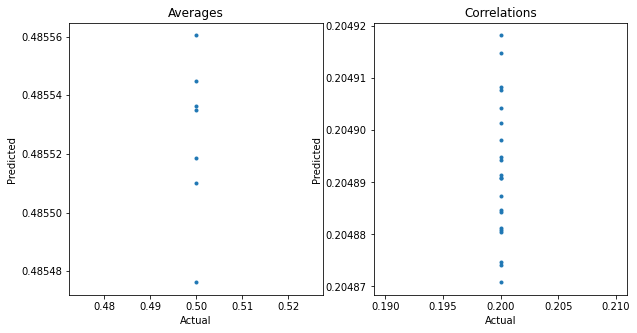

In [9]:
fig, axes = plt.subplots(1,2,figsize=(10,5)) 
axes[0].plot(avgs, pred_avgs,".")
axes[0].set_title('Averages')  
axes[0].set_xlabel('Actual')  
axes[0].set_ylabel('Predicted')  
axes[1].plot(flatten_corr(corrs),flatten_corr(pred_corrs),".")
axes[1].set_title('Correlations') 
axes[1].set_xlabel('Actual')  
axes[1].set_ylabel('Predicted')  
plt.show()